In [44]:
pip install spotipy

In [45]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

In [46]:
client_id = 'a1c3c34f8d8546edb98e473d5de8a638'
client_secret = '671b833ec7644d5b85cc99ce34edf02b'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [47]:
name = ["Drake"]
result = sp.search(name) 
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
  'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
  'id': '2hlmm7s2ICUX0LVIhVFlZQ',
  'name': 'Gunna',
  'type': 'artist',
  'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
  'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
  'id': '3TVXtAsR1Inumwj472S9r4',
  'name': 'Drake',
  'type': 'artist',
  'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}]

In [48]:
#Extract Artist's uri
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
#Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])
    
artist_album_names
artist_album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:3SpBlxme9WbeQdI9kx7KAV',
 'spotify:album:6sp02aeyiwfX35xRqwNiPv',
 'spotify:album:6OQ9gBfg5EXeNAEwGSs6jK',
 'spotify:album:45c1tgTktunRMmfh3WVh8U',
 'spotify:album:7dqpveMVcWgbzqYrOdkFTD',
 'spotify:album:6CY70qRxPutN3VKfYhNREa',
 'spotify:album:2podUJIFG8hLfFz7Kqe8yJ',
 'spotify:album:1ATL5GLyefJaxhQzSPVrLX',
 'spotify:album:42wvKYHFezpmDuAP43558f',
 'spotify:album:1lXY618HWkwYKJWBRYR4MK',
 'spotify:album:4dvkEfxroInqojJWP06R2V',
 'spotify:album:40GMAhriYJRO1rsY4YdrZb',
 'spotify:album:2yIwhsIWGRQzGQdn1czSK0',
 'spotify:album:15QCBYjP6HwHvsff100UBx',
 'spotify:album:1ozpmkWcCHwsQ4QTnxOOdT',
 'spotify:album:0ptlfJfwGTy0Yvrk14JK1I',
 'spotify:album:5bqZfS9HUBTtxW0UiG05qC',
 'spotify:album:2ZUFSbIkmFkGag000RWOpA',
 'spotify:album:5mz0mJxb80gqJIcRf9LGHJ',
 'spotify:album:766Pi8jEi9JZRvi4y9KRdP']

In [49]:
def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artist_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [50]:
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Certified Lover Boy album songs has been added to spotify_albums dictionary
Certified Lover Boy album songs has been added to spotify_albums dictionary
Dark Lane Demo Tapes album songs has been added to spotify_albums dictionary
Dark Lane Demo Tapes album songs has been added to spotify_albums dictionary
Care Package album songs has been added to spotify_albums dictionary
Care Package album songs has been added to spotify_albums dictionary
So Far Gone album songs has been added to spotify_albums dictionary
Scorpion album songs has been added to spotify_albums dictionary
Scorpion album songs has been added to spotify_albums dictionary
More Life album songs has been added to spotify_albums dictionary
More Life album songs has been added to spotify_albums dictionary
Views album songs has been added to spotify_albums dictionary
Views album songs has been added to spotify_albums dictionary
What A Time To Be Alive album songs has been added to spotify_albums dictionary
What A Time To Be Aliv

In [51]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [52]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 19.504558324813843 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 40.00555157661438 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 57.68335843086243 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 71.37632727622986 seconds


In [53]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

359

In [54]:
import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Certified Lover Boy,1,2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,0.758,0.423,0.667,0.000000,0.246,-7.012,0.326,86.743,0.496,81
1,Certified Lover Boy,2,6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,0.112,0.701,0.741,0.000000,0.699,-6.157,0.313,140.177,0.588,75
2,Certified Lover Boy,3,37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),spotify:track:37Nqx7iavZpotJSDXZWbJ3,0.181,0.767,0.438,0.000000,0.142,-8.726,0.290,86.975,0.381,85
3,Certified Lover Boy,4,61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),spotify:track:61S79KIVA4I9FXbnsylEHT,0.614,0.686,0.385,0.000000,0.131,-8.350,0.297,143.070,0.147,78
4,Certified Lover Boy,5,4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),spotify:track:4VCbgIdr8ptegWeJpqLVHH,0.354,0.730,0.576,0.000036,0.150,-5.442,0.287,92.131,0.155,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,Nothing Was The Same (Deluxe),12,5Rt6mMpBO5hTrAN3PEwycc,Too Much,spotify:track:5Rt6mMpBO5hTrAN3PEwycc,0.189,0.728,0.556,0.000000,0.139,-5.909,0.533,140.643,0.152,21
355,Nothing Was The Same (Deluxe),13,4vT34cEilUaDRVodLg0EgP,Pound Cake / Paris Morton Music 2,spotify:track:4vT34cEilUaDRVodLg0EgP,0.130,0.520,0.790,0.000035,0.112,-5.392,0.527,164.227,0.251,24
356,Nothing Was The Same (Deluxe),14,3dIPdHz3LA46d7wcpMFZrq,Come Thru,spotify:track:3dIPdHz3LA46d7wcpMFZrq,0.141,0.453,0.465,0.000000,0.382,-5.811,0.231,77.075,0.476,20
357,Nothing Was The Same (Deluxe),15,4scnLHIvoqMpFBuN4Z8ld5,All Me,spotify:track:4scnLHIvoqMpFBuN4Z8ld5,0.072,0.866,0.502,0.000000,0.116,-6.941,0.299,122.059,0.397,24


In [55]:
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

359
180


In [56]:
final_df.head(2)

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Certified Lover Boy,1,2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,0.758,0.423,0.667,0.0,0.246,-7.012,0.326,86.743,0.496,81
1,Certified Lover Boy,2,6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,0.112,0.701,0.741,0.0,0.699,-6.157,0.313,140.177,0.588,75


In [57]:
final_df.album.unique()

array(['Certified Lover Boy', 'Dark Lane Demo Tapes', 'Care Package',
       'So Far Gone', 'Scorpion', 'More Life', 'Views',
       'What A Time To Be Alive', "If You're Reading This It's Too Late",
       'Nothing Was The Same (Deluxe)'], dtype=object)

In [58]:
dlmt = clb = final_df.loc[(final_df['album']=='Dark Lane Demo Tapes')]
cp = clb = final_df.loc[(final_df['album']=='Care Package')]
sfg = clb = final_df.loc[(final_df['album']=='So Far Gone')]
scorp = clb = final_df.loc[(final_df['album']=='Scorpion')]
ml = clb = final_df.loc[(final_df['album']=='More Life')]
views = clb = final_df.loc[(final_df['album']=='Views')]
wattba = clb = final_df.loc[(final_df['album']=='What A Time To Be Alive')]
iyrt = clb = final_df.loc[(final_df['album']=="If You're Reading This It's Too Late")]
nwts = clb = final_df.loc[(final_df['album']=='Nothing Was The Same')]


In [59]:
sfg.sort_values(by=['popularity'])


,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
119,So Far Gone,16,5hKi8LHc2GF5v9TSsvgZaf,Outro (feat. Chilly Gonzales),spotify:track:5hKi8LHc2GF5v9TSsvgZaf,0.98900,0.393,0.0878,0.856000,0.3160,-21.628,0.0530,185.562,0.1220,13
110,So Far Gone,7,1bMYRdTXYdj7KSu4r0O3IQ,A Night Off (feat. Lloyd),spotify:track:1bMYRdTXYdj7KSu4r0O3IQ,0.36200,0.565,0.5020,0.000002,0.1640,-5.594,0.0793,103.418,0.3320,16
111,So Far Gone,8,2p0KdK06O9KUMCQ0gsFF0P,Say What's Real,spotify:track:2p0KdK06O9KUMCQ0gsFF0P,0.66000,0.545,0.7550,0.000000,0.2090,-5.438,0.2570,115.029,0.4810,16
114,So Far Gone,11,3DQb8H8mBaxXtrpwZWfen1,Unstoppable (feat. Santigold & Lil Wayne),spotify:track:3DQb8H8mBaxXtrpwZWfen1,0.15900,0.775,0.9060,0.000000,0.7730,-2.806,0.3370,150.080,0.8410,18
107,So Far Gone,4,3baJKX6yyPUT92zNStX5z6,Let’s Call It Off (feat. Peter Bjorn and John),spotify:track:3baJKX6yyPUT92zNStX5z6,0.00454,0.794,0.7170,0.301000,0.1460,-4.629,0.0325,127.446,0.9370,19
116,So Far Gone,13,12iCwfAxGDFvpU7aTusAle,Sooner Than Later,spotify:track:12iCwfAxGDFvpU7aTusAle,0.19100,0.691,0.4980,0.000007,0.1070,-5.716,0.1440,94.990,0.5340,19
118,So Far Gone,15,71tHNdPFrCNiulvoKzeEuk,The Calm,spotify:track:71tHNdPFrCNiulvoKzeEuk,0.81200,0.468,0.7820,0.000018,0.1070,-8.303,0.8980,159.621,0.2400,20
117,So Far Gone,14,3x8P00PKvIL9w7Z3XI9zyW,Bria's Interlude (feat. Omarion),spotify:track:3x8P00PKvIL9w7Z3XI9zyW,0.20500,0.456,0.5090,0.000652,0.1220,-6.204,0.0895,147.154,0.2390,20
109,So Far Gone,6,2h65kdqlhMRtp5l5qIFA9v,Ignant Shit (feat. Lil Wayne),spotify:track:2h65kdqlhMRtp5l5qIFA9v,0.16500,0.622,0.8440,0.000000,0.4550,-3.759,0.2690,94.449,0.1200,25
121,So Far Gone,18,0ISIeXBvGQIcQGYfR56jy8,Congratulations,spotify:track:0ISIeXBvGQIcQGYfR56jy8,0.01930,0.393,0.8520,0.000000,0.2910,-2.278,0.0726,106.902,0.1500,26


In [60]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from IPython.core.pylabtools import figsize
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

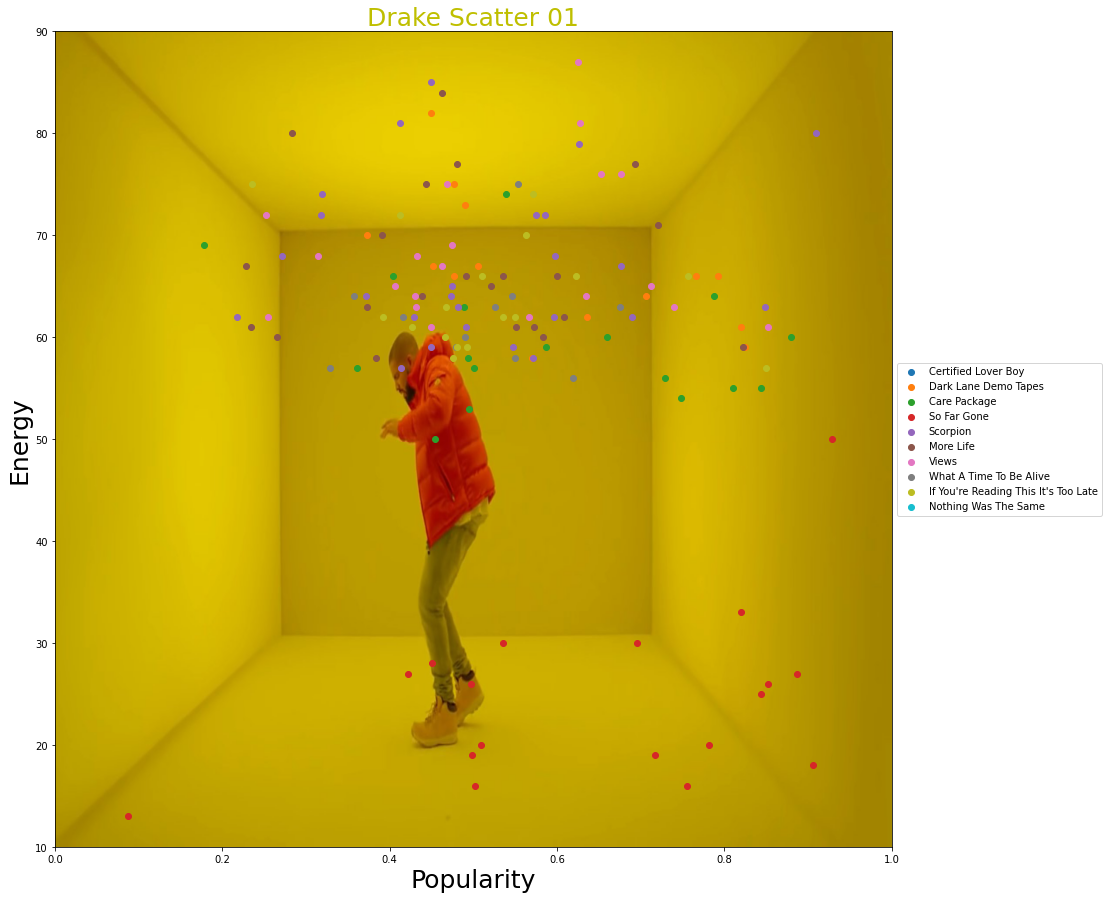

In [67]:
x = clb['energy']
y = clb['popularity']
x2 = dlmt['energy']
y2 = dlmt['popularity']
x3 = cp['energy']
y3 = cp['popularity']
x4 = sfg['energy']
y4 = sfg['popularity']
x5 = scorp['energy']
y5 = scorp['popularity']
x6 = ml['energy']
y6 = ml['popularity']
x7 = views['energy']
y7 = views['popularity']
x8 = wattba['energy']
y8 = wattba['popularity']
x9 = iyrt['energy']
y9 = iyrt['popularity']
x10 = nwts['energy']
y10 = nwts['popularity']
#name = fulldf['name'].index
#clrs = fulldf['who']
figure(figsize=(15,15))
img = plt.imread('driz.jpg')
face = plt.imread('facey.png')
plt.title('Drake Scatter 01', fontsize=25, c='y')
plt.scatter(x, y, label='Certified Lover Boy')
plt.scatter(x2, y2, label = 'Dark Lane Demo Tapes')
plt.scatter(x3, y3, label = 'Care Package')
plt.scatter(x4, y4, label = 'So Far Gone')
plt.scatter(x5, y5, label = 'Scorpion')
plt.scatter(x6, y6, label = 'More Life')
plt.scatter(x7, y7, label = 'Views')
plt.scatter(x8, y8, label = 'What A Time To Be Alive')
plt.scatter(x9, y9, label = "If You're Reading This It's Too Late")
plt.scatter(x10, y10, label = 'Nothing Was The Same ')
plt.xlabel("Popularity", fontsize=25)
plt.ylabel('Energy', fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.imshow(img, zorder=0, extent=[0.0, 1.0, 10.00, 90], aspect='auto')
plt.show()

